# Resposta via Série de Fourier

## Teoria
Supondo que a  força aplicada seja periódica, com frequência fundamental $\omega = 2\pi/\tau$, podemos escrevê-la como

$$ f(t) = \frac{a_0}{2} + \sum_{j=1}^\infty
\left[ a_j \cos(j \omega t) + b_j \sin(j \omega t) \right],$$
com
$$ a_j = \int_0^\tau f(t) \cos(j\omega t)\, dt, \quad
   b_j = \int_0^\tau f(t) \sin(j\omega t)\, dt. $$

## Resposta
Neste caso, a resposta é dada por

$$x(t) = \frac{a_0}{2k} + 
\sum_{j=1}^{\infty}
\left[ \frac{a_j/k}{\sqrt{(1-(jr)^2)^2 + (2j\zeta r)^2}}\cos(j\omega t - \phi_j)
+
 \frac{b_j/k}{\sqrt{(1-(jr)^2)^2 + (2j\zeta r)^2}}\sin(j\omega t - \phi_j)
 \right],$$
com 
$$ r = \frac{\omega}{\omega_n}, \quad \tan \phi_j  = \frac{2j\zeta r}{1-(jr)^2}.$$

## Setup

In [1]:
import numpy as np
import sympy as sp
from sympy.abc import t # Não usar como variável do Python!!!
import matplotlib.pyplot as plt

## Sistema mecânico

In [2]:
m = 1
c = 1.2
k = 40

## Propriedades dinâmicas

In [3]:
wn = np.sqrt(k/m)
cc = 2*m*wn
zeta = c/cc
print(f"Frequência natural: {wn:.3g} rad/s, Razão de amortecimento: {zeta:.3g}")
print(f"Período natural: {2*np.pi/wn:.3g} s.")

Frequência natural: 6.32 rad/s, Razão de amortecimento: 0.0949
Período natural: 0.993 s.


## Força aplicada

Temos que fornecer uma força periódica e sua série de fourier.
Vamos usar uma onda quadrada.

A figura abaixo mostra um período da força.


Período Fundamental: 2 s.
Frequência Fundamental: 3.14 rad/s


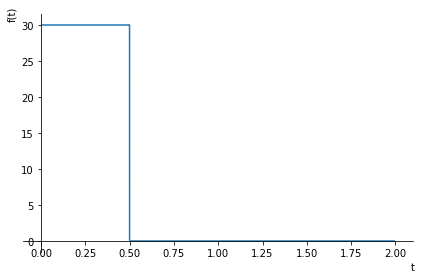

In [38]:
tau = 2
mag = 30
w0 = 2*np.pi/tau
nterm = 21             # for the numerical computation down below

f = sp.Piecewise((mag, t<tau/4),(0, True))
print(f"Período Fundamental: {tau:.3g} s.")
print(f"Frequência Fundamental: {w0:.3g} rad/s")
p = sp.plot(f, (t, 0, tau))


## Série de Fourier

In [39]:
s = sp.fourier_series(f, (t, 0, tau))
display(s)

FourierSeries(Piecewise((30, t < 0.5), (0, True)), (t, 0, 2), (7.5, SeqFormula(Piecewise((30*sin(_n*pi/2)/(_n*pi), (_n > -oo) & (_n < oo) & Ne(_n, 0)), (15.0, True))*cos(_n*pi*t), (_n, 1, oo)), SeqFormula(Piecewise((-30*cos(_n*pi/2)/(_n*pi) + 30/(_n*pi), (_n > -oo) & (_n < oo) & Ne(_n, 0)), (0, True))*sin(_n*pi*t), (_n, 1, oo))))

Podemos examinar diretamente os coeficientes, o que é interessante neste caso.

In [40]:
display(s.a0) # constant term
display(s.an) # cosine terms
display(s.bn) # sine terms

7.50000000000000

SeqFormula(Piecewise((30*sin(_n*pi/2)/(_n*pi), (_n > -oo) & (_n < oo) & Ne(_n, 0)), (15.0, True))*cos(_n*pi*t), (_n, 1, oo))

SeqFormula(Piecewise((-30*cos(_n*pi/2)/(_n*pi) + 30/(_n*pi), (_n > -oo) & (_n < oo) & Ne(_n, 0)), (0, True))*sin(_n*pi*t), (_n, 1, oo))

Para plotar a função precisamos de uma série finita.

A função truncate retorna apenas os termos não nulos!

In [41]:
sk = s.truncate(nterm)            # Choose one
display(sk)

30*sin(pi*t)/pi + 30*sin(2*pi*t)/pi + 10*sin(3*pi*t)/pi + 6*sin(5*pi*t)/pi + 10*sin(6*pi*t)/pi + 30*sin(7*pi*t)/(7*pi) + 10*sin(9*pi*t)/(3*pi) + 6*sin(10*pi*t)/pi + 30*sin(11*pi*t)/(11*pi) + 30*sin(13*pi*t)/(13*pi) + 30*sin(14*pi*t)/(7*pi) + 2*sin(15*pi*t)/pi + 30*sin(17*pi*t)/(17*pi) + 10*sin(18*pi*t)/(3*pi) + 30*sin(19*pi*t)/(19*pi) + 10*sin(21*pi*t)/(7*pi) + 30*sin(22*pi*t)/(11*pi) + 30*sin(23*pi*t)/(23*pi) + 6*sin(25*pi*t)/(5*pi) + 30*sin(26*pi*t)/(13*pi) + 30*cos(pi*t)/pi - 10*cos(3*pi*t)/pi + 6*cos(5*pi*t)/pi - 30*cos(7*pi*t)/(7*pi) + 10*cos(9*pi*t)/(3*pi) - 30*cos(11*pi*t)/(11*pi) + 30*cos(13*pi*t)/(13*pi) - 2*cos(15*pi*t)/pi + 30*cos(17*pi*t)/(17*pi) - 30*cos(19*pi*t)/(19*pi) + 10*cos(21*pi*t)/(7*pi) - 30*cos(23*pi*t)/(23*pi) + 6*cos(25*pi*t)/(5*pi) + 7.5

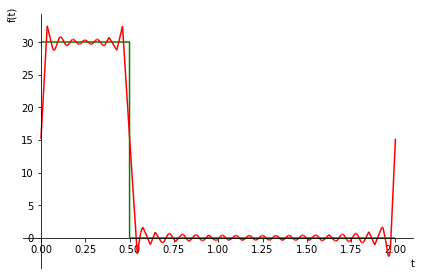

In [42]:
fp = sp.plot(f, sk, (t, 0, tau), show=False)
fp[0].line_color = "green"
fp[1].line_color = "red"
fp.show()

##  Computação numérica
A avaliação simbólica é sempre muito lenta, pode ser interessante converter para uma computação puramente numérica.

Não vamos usar isto agora, está aqui só para ficar registrado com é feito para quando eu precisar depois :)

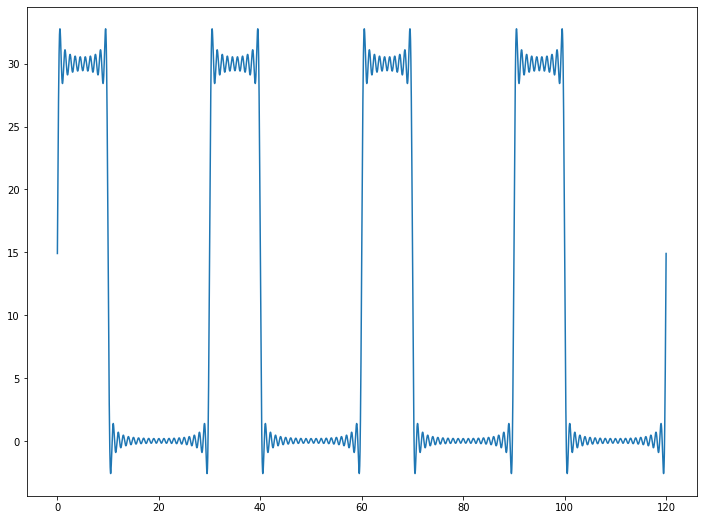

In [43]:
final_time = 4*tau
npoints = int(np.ceil(final_time*300))
sn = sp.lambdify(t, sk, 'numpy')
fig, ax = plt.subplots()
times = np.linspace(0, final_time, npoints, endpoint=True)
ax.plot(times, sn(times))
fig.set_size_inches(12,9)
fig.show()

# Preparação da resposta

Isto aqui está mais complicado do que é estritamente necessário porque eu quero evitar trabalhar com termos nulos. Isto é muito estúpido, não façam isto.

Por exemplo, se a função a par, a série só tem termos em $\cos$, $b_n = 0$.
Se a função é impar, a série é composta apenas por termos em $\sin$, $a_n = 0$ para $n>1$.

Além disto, mesmo que a função seja par ou impar, dependendo da forma da função muitos coeficientes podem ser nulos.

In [44]:
A = sp.Wild('A')
F = sp.WildFunction('F')
w = sp.Wild('w')
cos_terms = []
sin_terms = []
a0 = np.float64(0.0)
for term in sk.as_ordered_terms():
  # Separate series into sin and cosine coeficients
  term = term.evalf()   # Evaluates the coeficient as a fp number
  if type(term) == sp.core.numbers.Float: #  a0
    a0 = np.float64(term)
  else: # an or bn
    m = term.match(A*F) # separate into amplitude and function
    if m[A] == 0:       # some terms may evaluate to 0
      continue 
    m2 = m[F].match(sp.sin(w*t))
    if m2:
      freq = m2[w].evalf()
      sin_terms.append((m[A], freq))
    else:
      m2 = m[F].match(sp.cos(w*t))
      freq = m2[w].evalf()
      cos_terms.append((m[A], freq))
#print(a0)
#print(cos_terms)
#print(sin_terms)


### Conversão para valores numéricos

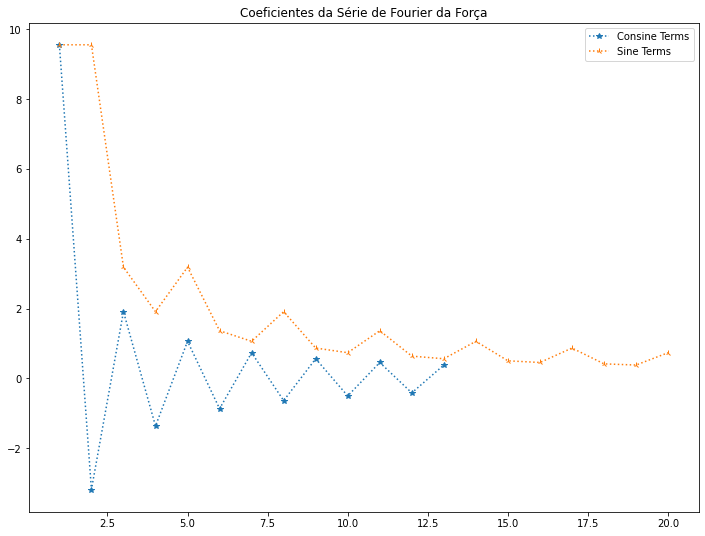

In [45]:
cterms = np.array(cos_terms, np.float64)
sterms = np.array(sin_terms, np.float64)
fig, ax = plt.subplots()
ax.plot(np.arange(cterms.shape[0])+1, cterms[:,0], linestyle='dotted',
        marker="*")
ax.plot(np.arange(sterms.shape[0])+1, sterms[:,0], linestyle='dotted',
        marker="2")
ax.set_title("Coeficientes da Série de Fourier da Força")
ax.legend(["Consine Terms", "Sine Terms"])
fig.set_size_inches(12, 9)
fig.show()

# Série da resposta

Como já temos o $j\omega$ calculado nas listas, fica mais conveviente reescrever os coeficientes da resposta da seguinte forma:

$$ A_j  = \frac{a_j/k}{\sqrt{(1-(j\omega/\omega_n)^2)^2 + (2\zeta j\omega/\omega_n)^2}}, \quad
   B_j = \frac{b_j/k}{\sqrt{(1-(j\omega/\omega_n)^2)^2 + (2\zeta j\omega/\omega_n)^2}},$$

e da mesma forma para o ângulo de fase,

$$ \tan \phi_j  = \frac{2\zeta j\omega/\omega_n}{1-(j\omega/\omega_n)^2}.$$

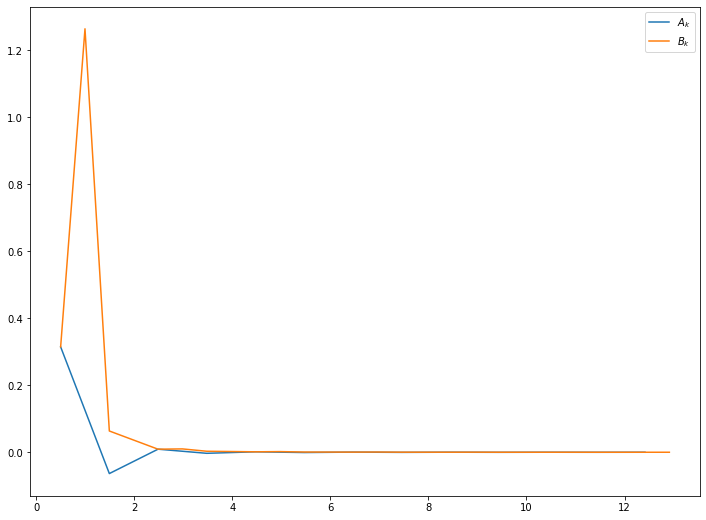

In [46]:
w0 = 2*np.pi/tau    # Frequência fundamental
aj = cterms[:,0]
wcj = cterms[:,1]
wcjn = wcj/wn
Aj = (aj/k)/np.sqrt((1.0 - wcjn**2)**2 + (2*zeta*wcjn)**2)
cphi = np.arctan2(2*zeta*wcjn, 1 - wcjn**2)

bj = sterms[:,0]
wsj = sterms[:,1]
wsjn = wsj/wn
Bj = (bj/k)/np.sqrt((1.0 - wsjn**2)**2 + (2*zeta*wsjn)**2)
sphi = np.arctan2(2*zeta*wsjn, 1 - wsjn**2)
#display(Aj)
#display(wcj)

fig, ax = plt.subplots()
ax.plot(wcjn, Aj)
ax.plot(wsjn, Bj)
ax.legend([r'$A_k$', r'$B_k$'])
fig.set_size_inches(12, 9)
fig.show()

# Plotagem dos termos
Só por curiosidade, vamos plotar os tremos das série.

## Termos em cosseno

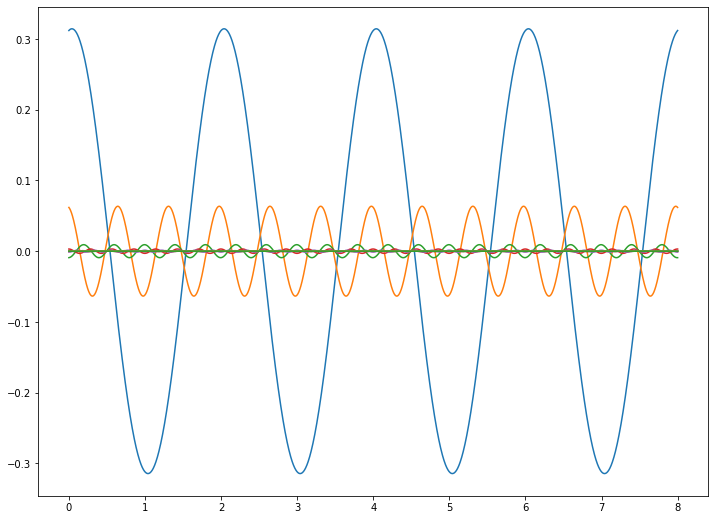

In [47]:
fig, ax = plt.subplots()
for A, cw, phi in zip(Aj, wcj, cphi):
  ax.plot(times, A*np.cos(cw*times-phi))
fig.set_size_inches(12, 9)
fig.show()

## Termos em seno

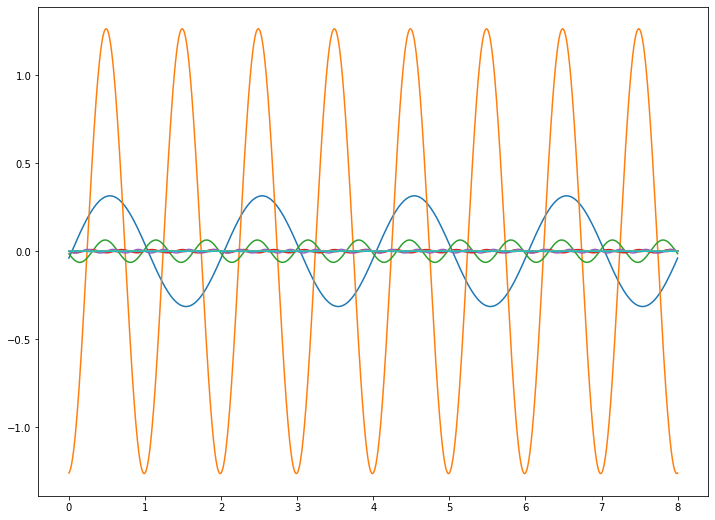

In [48]:
fig, ax = plt.subplots()
for B, sw, phi in zip(Bj, wsj, sphi):
  ax.plot(times, B*np.sin(sw*times-phi))
fig.set_size_inches(12, 9)
fig.show()

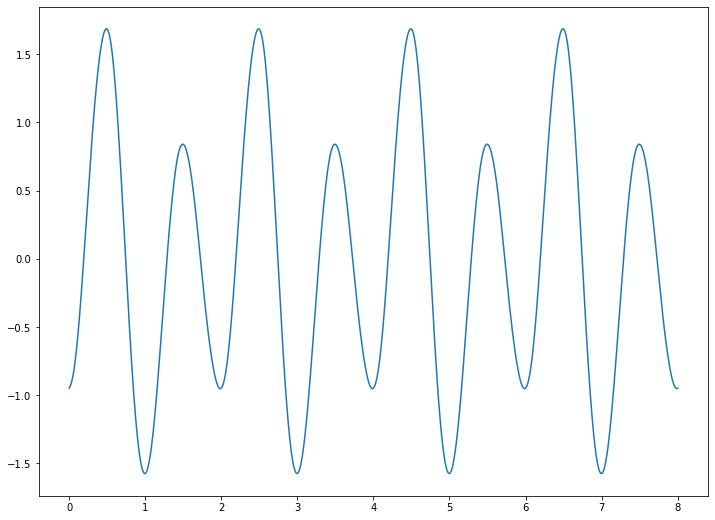

In [49]:
cjw = cterms[:,1]
sjw = sterms[:,1]

fig, ax = plt.subplots()
ax.plot(times, Aj[0]*np.cos(cjw[0]*times-cphi[0]) +
               Bj[0]*np.sin(sjw[0]*times-sphi[0]) +
               Aj[1]*np.cos(cjw[1]*times-cphi[1]) +
               Bj[1]*np.sin(sjw[1]*times-sphi[1]) +
               Aj[2]*np.cos(cjw[2]*times-cphi[2]) +
               Bj[2]*np.sin(sjw[2]*times-sphi[2]) +
               Aj[3]*np.cos(cjw[3]*times-cphi[3]) +
               Bj[3]*np.sin(sjw[3]*times-sphi[3]) +
               Aj[4]*np.cos(cjw[4]*times-cphi[4]) +
               Bj[4]*np.sin(sjw[4]*times-sphi[4]) +
               Aj[5]*np.cos(cjw[5]*times-cphi[5]) +
               Bj[5]*np.sin(sjw[5]*times-sphi[5]) )
fig.set_size_inches(12, 9)
fig.show(times)

# Resposta Final

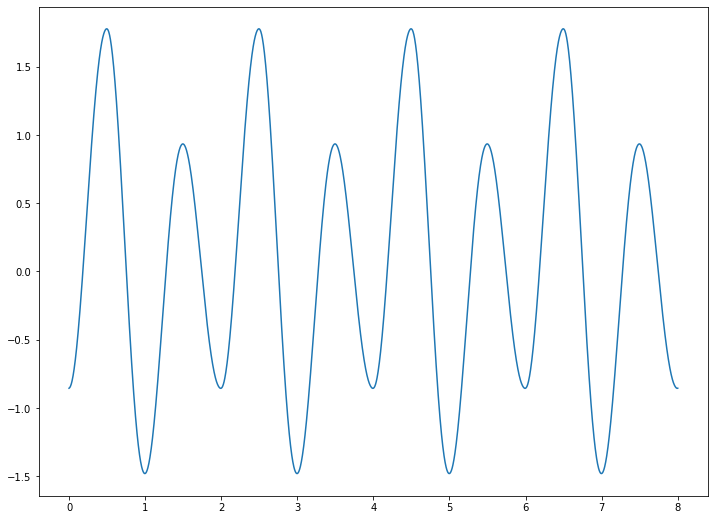

In [50]:
xp = a0/(2*k) + Aj.dot(np.cos(cjw[:,np.newaxis]*times - cphi[:,np.newaxis])) + \
                Bj.dot(np.sin(sjw[:,np.newaxis]*times - sphi[:,np.newaxis]))
fig, ax = plt.subplots()
ax.plot(times, xp)
fig.set_size_inches(12, 9)
fig.show()